<a href="https://colab.research.google.com/github/Hebabeg/mlprojects/blob/main/Content_Based_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommendation system:
Content/ User specific recommendation system: Recommending movies based on the users past searches or past movies watched, focusing on the genres - Recommended for you on Youtube, or you may also like section, etc

Popularity based recommendation system: Recommends movies based on most watched overall - Popular now on shopping sites or trending on YT

Collaborative recommendation system: Recommends movies based on what people who watched the same movie watched - People also bought, frequently bought together on shopping sites (Clustering)

Importing the libraries

In [47]:
import matplotlib.pyplot as plt


In [1]:
import numpy as np
import pandas as pd
import difflib #in case the user makes an error while typing the movie name
from sklearn.feature_extraction.text import TfidfVectorizer #textual to numerical value (feature vectors)
from sklearn.metrics.pairwise import cosine_similarity #suggesting movies that are similar to the one added by the user (content based recommendation system)

In [4]:
# loading the data from the csv file to apandas dataframe
movies = pd.read_csv('/content/movies.csv')

In [10]:
column = movies.columns
for column in  column:
  print(column)

#use popularity, revenue, cast, director, crew, vote average when working on a popularity based recommendation system

index
budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
cast
crew
director


In [5]:
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
movies.shape

(4803, 24)

In [17]:
# for our specific content based recommendation system we will take these columns:
chosen_features = ['genres','keywords','tagline','cast','director', 'overview']
print(chosen_features)

['genres', 'keywords', 'tagline', 'cast', 'director', 'overview']


In [23]:
for feature in chosen_features:
  movies[feature] = movies[feature].fillna(' ')

In [25]:
movies_data_features = movies['genres']+' '+movies['keywords']+' '+movies['tagline']+' '+movies['cast']+' '+movies['director']+' '+ movies['overview']

In [26]:
print(movies_data_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [28]:
# converting the text data to feature vectors

vector = TfidfVectorizer()

In [29]:
feature_vector = vector.fit_transform(movies_data_features)

#Cosine Similarity

A metric used to measure how similar two non-zero vectors are. Often used in fields such as NLP or ML tasks like document similarity analysis, recommendation systems, and clustering.

In [32]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vector)

In [33]:
print(similarity)

[[1.         0.05083168 0.0332947  ... 0.02749812 0.0304889  0.0072518 ]
 [0.05083168 1.         0.04356836 ... 0.05077045 0.03100979 0.01521198]
 [0.0332947  0.04356836 1.         ... 0.02646984 0.04751623 0.01372603]
 ...
 [0.02749812 0.05077045 0.02646984 ... 1.         0.03481447 0.03546821]
 [0.0304889  0.03100979 0.04751623 ... 0.03481447 1.         0.03098945]
 [0.0072518  0.01521198 0.01372603 ... 0.03546821 0.03098945 1.        ]]


In [34]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [62]:

fav_movie = input('Whats your favorite movie:' )

Whats your favorite movie:Animal Farm


In [63]:
titles_list = movies['title'].tolist()
print(titles_list)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [64]:

new_match = difflib.get_close_matches(fav_movie, titles_list)
print(new_match)

['Animals', 'Animal House', 'Anomalisa']


In [65]:
movie_match = new_match[0]
print(movie_match)

Animals


In [66]:

movie_index = movies[movies.title == movie_match]['index'].values[0]
print(movie_index)

3544


In [67]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[movie_index]))
print(similarity_score)

[(0, 0.03572651926533247), (1, 0.049739897375075205), (2, 0.02300076164483536), (3, 0.02613424321652158), (4, 0.04442475239982732), (5, 0.04627440716603134), (6, 0.034556531108141234), (7, 0.03868069858164867), (8, 0.032848370646764304), (9, 0.027753428533541923), (10, 0.05171050696886376), (11, 0.026921053730217998), (12, 0.016076973005188525), (13, 0.03627240913319951), (14, 0.052470836793910104), (15, 0.06439384350676823), (16, 0.03304306604324166), (17, 0.04430073364145381), (18, 0.05770534684442166), (19, 0.05123270980921954), (20, 0.03824924742959327), (21, 0.04020103333508649), (22, 0.05661650020716013), (23, 0.03085432333789972), (24, 0.029048049467127537), (25, 0.05147660051604537), (26, 0.03517708697393267), (27, 0.051047285530386906), (28, 0.016873072219891767), (29, 0.038930341013047355), (30, 0.036200952210651616), (31, 0.020432872427461404), (32, 0.06237958537901374), (33, 0.020770249779167214), (34, 0.05814751856303921), (35, 0.01253285985208267), (36, 0.0612250941044879

In [68]:
similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(similar_movies)

[(3544, 1.0), (4082, 0.1293000803149956), (2827, 0.1260679386797446), (2991, 0.12334391794190416), (1222, 0.12123944192498783), (2597, 0.11733644161830108), (231, 0.11648520543454548), (3628, 0.11588138654228934), (698, 0.11515593088674898), (2245, 0.11150735279854183), (156, 0.11082009704893894), (48, 0.11057163210747423), (2755, 0.11051630421538704), (310, 0.10805863703304411), (2160, 0.10802729554440971), (2415, 0.10740818666311158), (661, 0.10722421997854535), (1959, 0.10672986191836187), (1592, 0.10626935780088258), (3837, 0.10574329129289668), (1504, 0.10553931776027865), (619, 0.10504594206679092), (1696, 0.10399905539469019), (3718, 0.10340300150329122), (323, 0.10296699995353725), (3329, 0.10252978021601745), (1271, 0.10229119876793061), (1455, 0.10223971926695265), (542, 0.10174538461697258), (4562, 0.10156841892868604), (1745, 0.10146615191752903), (4322, 0.09942530281587357), (2824, 0.09885181552737617), (3432, 0.09809545823502668), (1753, 0.09773404741624045), (4644, 0.097

In [69]:
# print the name of similar movies based on the index

print('Recommended for you : \n')

i = 1

for movie in similar_movies:
  index = movie[0]
  title_from_index = movies[movies.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Recommended for you : 

1 . Animals
2 . Courageous
3 . Crossroads
4 . Bill & Ted's Excellent Adventure
5 . Sex Tape
6 . Confidence
7 . Monsters, Inc.
8 . Of Gods and Men
9 . The Prince of Egypt
10 . The Brothers Bloom
11 . The Last Samurai
12 . Jack the Giant Slayer
13 . Earth to Echo
14 . In the Heart of the Sea
15 . Stay Alive
16 . A Night at the Roxbury
17 . Zathura: A Space Adventure
18 . Star Trek IV: The Voyage Home
19 . Black Rain
20 . She's the One
21 . The Big Wedding
22 . Hall Pass
23 . Straight Outta Compton
24 . Fugly
25 . Sex and the City 2
26 . The Hole
27 . Pandorum
28 . Radio Flyer
29 . Carriers


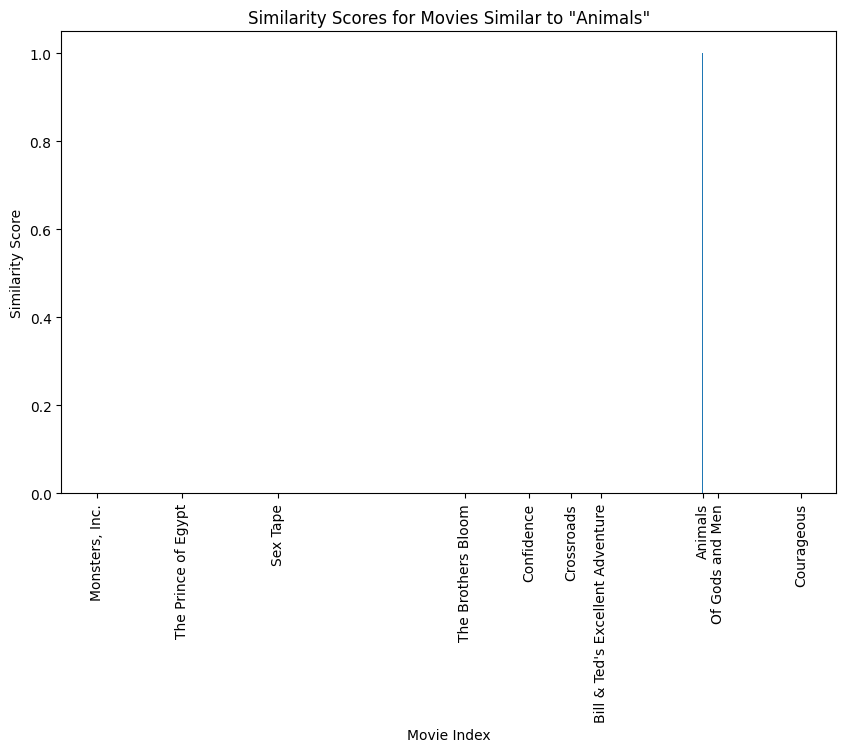

In [71]:
N = 10
top_similar_movies = similar_movies[:N]

movie_indices, scores = zip(*top_similar_movies)

plt.figure(figsize=(10, 6))
plt.bar(movie_indices, scores)
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores for Movies Similar to "{}"'.format(titles_list[movie_index]))
plt.xticks(movie_indices, [titles_list[i] for i in movie_indices], rotation=90)
plt.show()

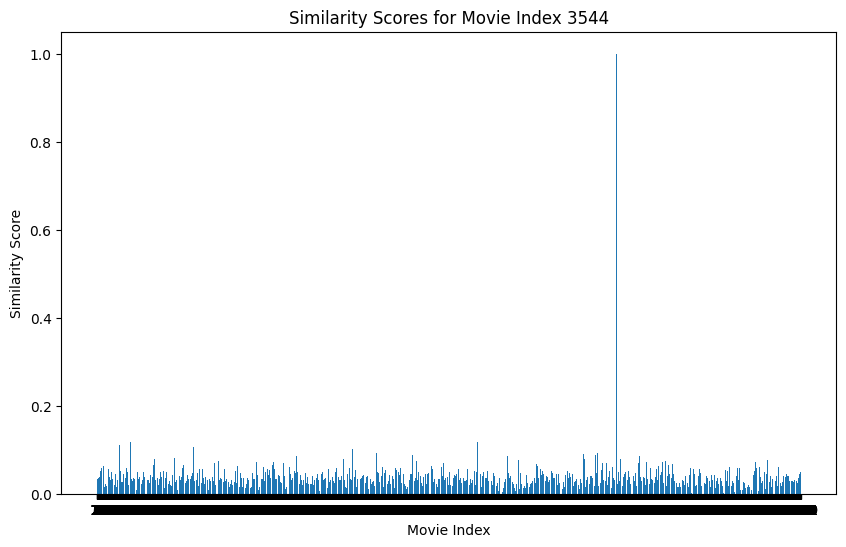

In [72]:
movie_indices, scores = zip(*similarity_score)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(movie_indices, scores)
plt.xlabel('Movie Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores for Movie Index {}'.format(movie_index))
plt.xticks(movie_indices)  # Set x-axis ticks to movie indices
plt.show()
